Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding 

Insights to be drawn -

- Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [2]:
import requests as req
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/jeckymaster/Assignments_Jecky_Master/main/episodes_data.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,02-10-2016,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,09-10-2016,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,16-10-2016,09:00 PM,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,23-10-2016,09:00 PM,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,30-10-2016,09:00 PM,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [6]:
rating_seasons = df.groupby('season')['average_rating'].mean().reset_index()

In [7]:
rating_seasons

,season,average_rating
0,1,8.0900
1,2,8.0000
2,3,7.7750
3,4,7.5375


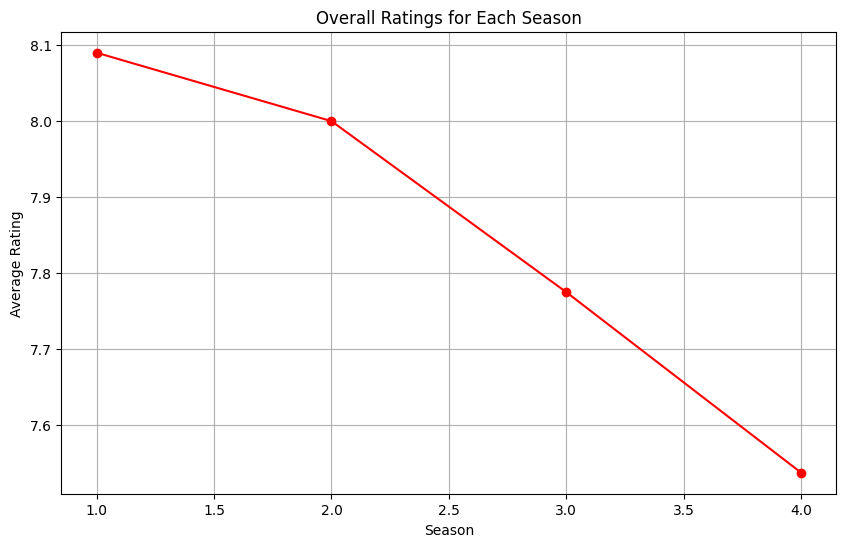

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(rating_seasons['season'], rating_seasons['average_rating'], marker='o', linestyle='-', color='r')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Overall Ratings for Each Season')
plt.grid(True)
plt.show()

### Get all the episode names, whose average rating is more than 8 for every season

In [9]:
episode_rate_gre_8 = df[df['average_rating'] > 8]

In [10]:
episode_rate_gre_8['name']

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

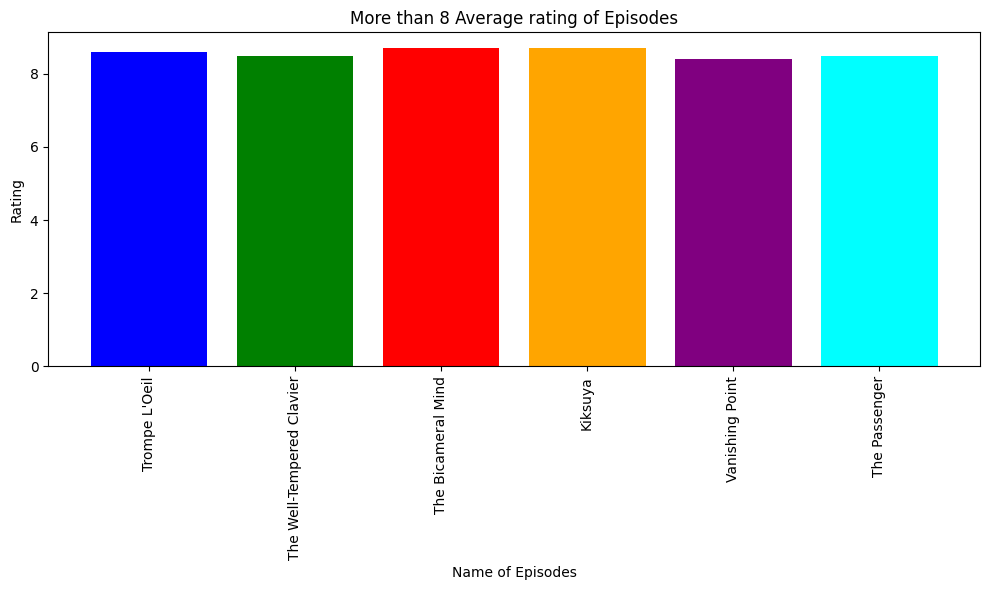

In [25]:
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan']

plt.figure(figsize=(10, 6))
plt.bar(episode_rate_gre_8['name'], episode_rate_gre_8['average_rating'], color=colors)
plt.xlabel("Name of Episodes")
plt.ylabel("Rating")
plt.title("More than 8 Average rating of Episodes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.colormaps()
plt.show()


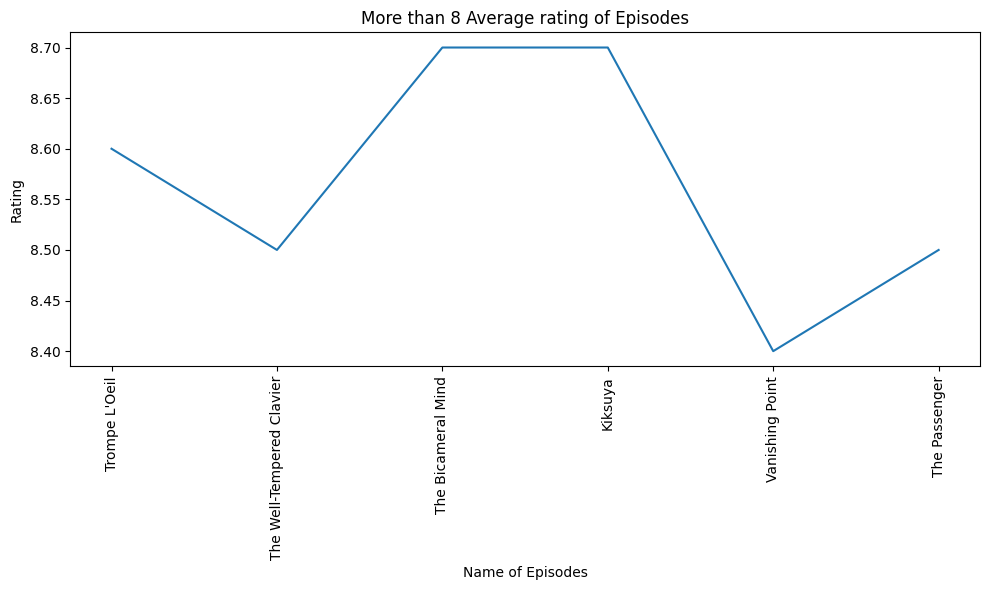

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(episode_rate_gre_8["name"], episode_rate_gre_8["average_rating"])
plt.xlabel("Name of Episodes")
plt.ylabel("Rating")
plt.title("More than 8 Average rating of Episodes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.colormaps()
plt.show()

### Get all the episode names that aired before May 2019

In [31]:
# converting the airdate into datetime format
df['airdate'] = pd.to_datetime(df['airdate'], format = '%d-%m-%Y') 

In [37]:
# applying cut off date for the upper bound
threshold_date = pd.to_datetime('2019-05-01')
episode_before_may19 = df[df['airdate'] < threshold_date]

In [41]:
print(f"The name of episodes aired before May-2019 are :")
print(episode_before_may19['name'])

The name of episodes aired before May-2019 are :
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object


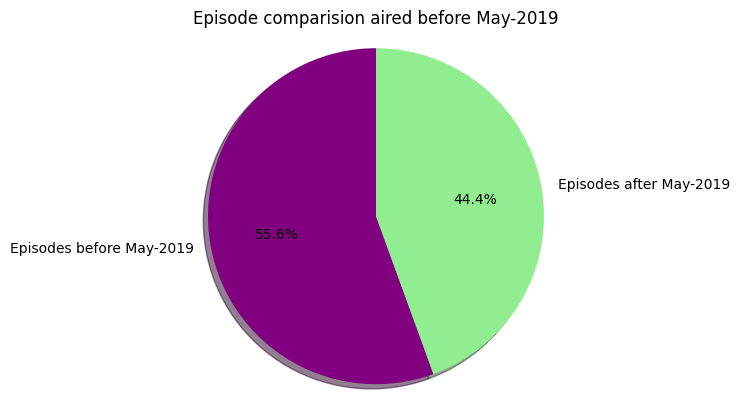

In [46]:
labels = ["Episodes before May-2019", "Episodes after May-2019"]
sizes = [len(episode_before_may19), len(df) - len(episode_before_may19)]
colors = ["purple", "lightgreen"]
plt.pie(sizes,  labels=labels, colors=colors,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Episode comparision aired before May-2019")
plt.
plt.show()

### Get the episode name from each season with the highest and lowest rating

In [112]:
epi_hi_rate =  df.groupby('season')['average_rating'].idxmax()
epi_hi_rate_name = df.loc[epi_hi_rate, ['season', 'name', 'average_rating']]

In [113]:
epi_hi_rate_name

,season,name,average_rating
9,1,The Bicameral Mind,8.7
17,2,Kiksuya,8.7
20,3,Parce Domine,8.0
32,4,Zhuangzi,7.8


In [68]:
epi_hi_rate_name['rate']='high'

In [69]:
epi_hi_rate_name

,season,name,average_rating,rate
9,1,The Bicameral Mind,8.7,high
17,2,Kiksuya,8.7,high
20,3,Parce Domine,8.0,high
32,4,Zhuangzi,7.8,high


In [64]:
epi_low_rate =  df.groupby('season')['average_rating'].idxmin()
epi_low_rate_name = df.loc[epi_low_rate, ['season', 'name', 'average_rating']]

In [70]:
epi_low_rate_name['rate']='low'

In [71]:
epi_low_rate_name

,season,name,average_rating,rate
2,1,The Stray,7.6,low
14,2,Akane No Mai,7.6,low
25,3,Decoherence,7.5,low
28,4,The Auguries,7.1,low


In [94]:
epi_low_hi_rate = pd.concat([epi_hi_rate_name, epi_low_rate_name], ignore_index=False)

In [97]:
epi_low_hi_rate.sort_values(by = 'season')

,season,name,average_rating,rate
9,1,The Bicameral Mind,8.7,high
2,1,The Stray,7.6,low
17,2,Kiksuya,8.7,high
14,2,Akane No Mai,7.6,low
20,3,Parce Domine,8.0,high
25,3,Decoherence,7.5,low
32,4,Zhuangzi,7.8,high
28,4,The Auguries,7.1,low


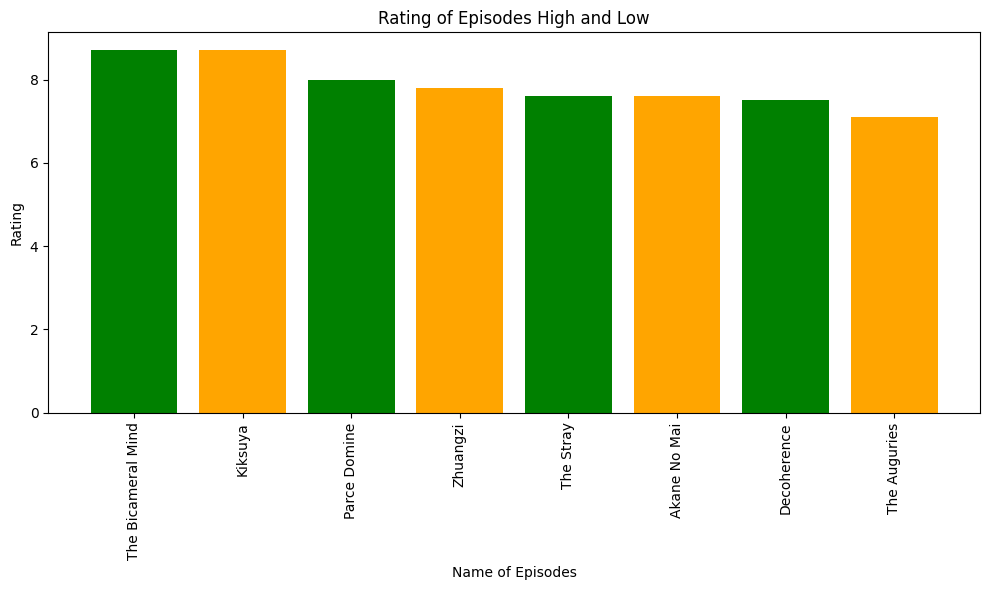

In [108]:
colors = ['green', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(epi_low_hi_rate['name'], epi_low_hi_rate['average_rating'], color=colors)
plt.xlabel("Name of Episodes")
plt.ylabel("Rating")
plt.title("Rating of Episodes High and Low")
plt.xticks(rotation=90)
plt.tight_layout()
plt.colormaps()
plt.show()

### Get the summary for the most popular ( ratings ) episode in every season

In [114]:
#epi_hi_rate =  df.groupby('season')['average_rating'].idxmax()
epi_hi_rate_summary = df.loc[epi_hi_rate, ['season', 'name', 'average_rating', 'summary']]

In [117]:
epi_hi_rate_summary

,season,name,average_rating,summary
9,1,The Bicameral Mind,8.7,Delores finds out the truth about William's fa...
17,2,Kiksuya,8.7,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,8.0,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,7.8,God is bored.


In [122]:
def to_print_summary(data):
    for i, row in data.iterrows():
        print(f"Season: {row['season']}")
        print(f"Name: {row['name']}")
        print(f"Average Rating: {row['average_rating']}")
        print(f"Summary: {row['summary']}")
        print("-----------------------------------------------------------------------------------------------------")

In [123]:
to_print_summary(epi_hi_rate_summary)

Season: 1
Name: The Bicameral Mind
Average Rating: 8.7
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.
-----------------------------------------------------------------------------------------------------
Season: 2
Name: Kiksuya
Average Rating: 8.7
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.
-----------------------------------------------------------------------------------------------------
Season: 3
Name: Parce Domine
Average Rating: 8.0
Summary: If you're stuck in a loop, try walking in a straight line.
-----------------------------------------------------------------------------------------------------
Season: 4
Name: Zhuangzi
Average Rating: 7.8
Summary: God is bored.
---------------